## Morley

In [1]:
from skfem import *
from skfem.models.poisson import unit_load
import numpy as np
from os.path import splitext
from sys import argv
from skfem.visuals.matplotlib import *
from skfem.utils import solver_iter_krylov
from scipy.sparse.linalg import LinearOperator, minres

In [4]:
%%timdrawm = MeshTri.init_symmetric()
m.refine(7)

e = ElementTriMorley()
ib = InteriorBasis(m, e)

@BilinearForm
def bilinf(u, v, w):
    from skfem.helpers import dd, ddot, trace, eye
    d = 0.1
    E = 200e9
    nu = 0.3

    def C(T):
        return E / (1 + nu) * (T + nu / (1 - nu) * eye(trace(T), 2))

    return d**3 / 12.0 * ddot(C(dd(u)), dd(v))


K = asm(bilinf, ib)
f = 1e6 * asm(unit_load, ib)

dofs = ib.find_dofs({
    'left':  m.facets_satisfying(lambda x: x[0] == 0),
    'right': m.facets_satisfying(lambda x: x[0] == 1),
    'top':   m.facets_satisfying(lambda x: x[1] == 1),
})

D = np.concatenate((
    dofs['left'].nodal['u'],
    dofs['left'].facet['u_n'],
    dofs['right'].nodal['u'],
    dofs['top'].nodal['u'],
))

x = solve(*condense(K, f, D=D))

Wall time: 1min


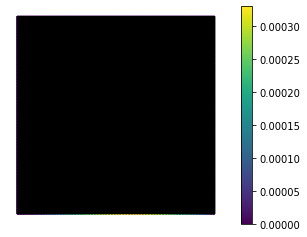

In [6]:
ax = draw(m)
plot(ib, x, ax=ax, shading='gouraud', colorbar=True, Nrefs=2)

In [5]:
help(draw)

Help on function draw in module skfem.visuals.matplotlib:

draw(m, **kwargs) -> matplotlib.axes._axes.Axes
    Visualize meshes.



## PoissonP1

&lt;matplotlib.axes._subplots.AxesSubplot at 0x18ff0cf6508&gt;

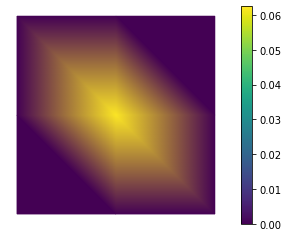

In [4]:
from skfem.visuals.matplotlib import plot, savefig
from sys import argv
from os.path import splitext
from skfem import *
from skfem.models.poisson import laplace, unit_load

m = MeshTri()
m.refine(1)

e = ElementTriP1()
basis = InteriorBasis(m, e)

A = asm(laplace, basis)
b = asm(unit_load, basis)

x = solve(*condense(A, b, I=m.interior_nodes()))


plot(m, x, shading='gouraud', colorbar=True)